<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preperation" data-toc-modified-id="Data-preperation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preperation</a></span></li><li><span><a href="#Create-the-network" data-toc-modified-id="Create-the-network-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create the network</a></span><ul class="toc-item"><li><span><a href="#Basic-concepts-and-definitions" data-toc-modified-id="Basic-concepts-and-definitions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Basic concepts and definitions</a></span></li></ul></li></ul></div>

# Bike Network Analysis

## Data preperation

In [36]:
# import modules
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [115]:
# read data
path_to_data = "../data/NYC-CitiBike-2016.csv"
df = pd.read_csv(path_to_data)
df.columns
df.columns = df.columns.str.replace(" ", "_")
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,839,1/1/2016 00:09:55,1/1/2016 00:23:54,532,S 5 Pl & S 4 St,40.710451,-73.960876,401,Allen St & Rivington St,40.720196,-73.989978,17109,Customer,NaN,0
1,686,1/1/2016 00:21:17,1/1/2016 00:32:44,3143,5 Ave & E 78 St,40.776829,-73.963888,3132,E 59 St & Madison Ave,40.763505,-73.971092,23514,Subscriber,1960.0,1
2,315,1/1/2016 00:33:11,1/1/2016 00:38:26,3164,Columbus Ave & W 72 St,40.777057,-73.978985,3178,Riverside Dr & W 78 St,40.784145,-73.983625,14536,Subscriber,1971.0,1
3,739,1/1/2016 00:40:51,1/1/2016 00:53:11,223,W 13 St & 7 Ave,40.737815,-73.999947,276,Duane St & Greenwich St,40.717488,-74.010455,24062,Subscriber,1969.0,1
4,1253,1/1/2016 00:44:16,1/1/2016 01:05:09,484,W 44 St & 5 Ave,40.755003,-73.980144,151,Cleveland Pl & Spring St,40.722104,-73.997249,16380,Customer,NaN,0


In [78]:
station_id = set(df["start_station_id"]).union(set(df["end_station_id"]))
len(station_id)

647

In [168]:
start_station_coord = df[["start_station_id", 
                          "start_station_name", 
                          "start_station_latitude", 
                          "start_station_longitude"]].\
                        drop_duplicates().\
                        rename(columns={"start_station_id": "id",
                                  "start_station_name": "name",
                                  "start_station_latitude": "lat",
                                  "start_station_longitude": "long"})

end_station_coord = df[["end_station_id", 
                        "end_station_name",
                        "end_station_latitude", 
                        "end_station_longitude"]].\
                        drop_duplicates(). \
                        rename(columns={"end_station_id": "id",
                                        "end_station_name": "name",
                                        "end_station_latitude": "lat",
                                        "end_station_longitude": "long"})

stations = pd.concat([start_station_coord, end_station_coord]).\
                        drop_duplicates(subset="id").\
                        sort_values("id").\
                        set_index("id")
stations.head()

,name,lat,long
id,,,
72,W 52 St & 11 Ave,40.767272,-73.993929
79,Franklin St & W Broadway,40.719116,-74.006667
82,St James Pl & Pearl St,40.711174,-74.000165
83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323
116,W 17 St & 8 Ave,40.741776,-74.001497


In [173]:
dict_stations = stations[["lat","long"]].drop_duplicates().T.to_dict()

In [120]:
trips = df

In [ ]:
plt.figure(1, figsize=(11, 5))
plt.clf()
colors = ['b', 'g', 'r']
for G in g:
    c = colors.pop(0)
    node_size = [int(G.pop[n] / 300.0) for n in G]
    nx.draw_networkx_edges(G, G.pos, edge_color=c, width=4, alpha=0.5)
    nx.draw_networkx_nodes(G, G.pos, node_size=node_size, node_color=c, alpha=0.5)
    nx.draw_networkx_nodes(G, G.pos, node_size=5, node_color='k')

for c in city:
    x, y = city[c]
    plt.text(x, y + 0.1, c)
plt.show()

In [116]:
#gb_graph = df.groupby(["start_station_id", "end_station_id"]).size().reset_index()
#gb_graph.rename(columns={0:"weight"}, inplace=True)
#gb_graph.head()

## Create the network

In [152]:
# creating an empty graph object
G = nx.DiGraph()

# iterating through the stations to add nodes
for n, d in stations.iterrows():
    G.add_node(n, attr_dict=d.to_dict(), pos=(d["lat"], d["long"]))

# use groupby to retrieve the pair of nodes and the data count
for (start, stop), d in trips.groupby(["start_station_id", "end_station_id"]):
    G.add_edge(start, stop, count = len(d))

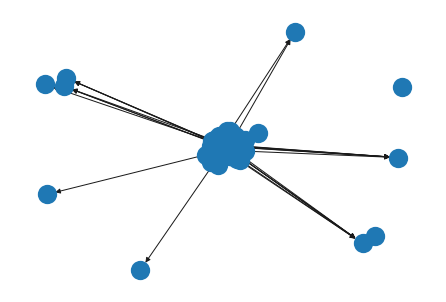

In [175]:

nx.draw(G)

In [178]:
from mpl_toolkits.basemap import Basemap
# Lambert Conformal Conic map.
m = Basemap(llcrnrlon=-100.,llcrnrlat=0.,urcrnrlon=-20.,urcrnrlat=57.,
            projection='lcc',lat_1=20.,lat_2=40.,lon_0=-60.,
            resolution ='l',area_thresh=1000.)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [53]:
# bike_graph.number_of_nodes()
# bike_graph.number_of_edges()
network_info = nx.info(bike_graph)
print(f"{network_info}")

Name: 
Type: DiGraph
Number of nodes: 647
Number of edges: 81056
Average in degree: 125.2798
Average out degree: 125.2798


In [154]:
nx.spring_layout(bike_graph, scale=2)

{72: array([0.02920616, 0.03978889]),
 116: array([0.01468851, 0.03795448]),
 127: array([0.03328977, 0.07777065]),
 128: array([0.00569205, 0.02719665]),
 146: array([-0.00820046,  0.03805038]),
 147: array([-0.01062883,  0.02948875]),
 151: array([-0.00256261,  0.01607971]),
 152: array([-0.0130834,  0.0158384]),
 153: array([0.0245892 , 0.02004209]),
 167: array([0.01792412, 0.01522722]),
 168: array([0.01426289, 0.02487993]),
 173: array([0.03188326, 0.02683673]),
 195: array([-0.00436071,  0.01766736]),
 212: array([0.02328711, 0.03185752]),
 225: array([0.01086346, 0.04477391]),
 229: array([0.00602691, 0.01483209]),
 236: array([0.00508127, 0.01187722]),
 237: array([0.00310457, 0.01738075]),
 238: array([0.00769091, 0.042679  ]),
 247: array([0.00881034, 0.03981208]),
 248: array([0.00533698, 0.05133051]),
 251: array([-0.00232769,  0.02010277]),
 252: array([0.00720714, 0.03118368]),
 254: array([0.00391531, 0.03761351]),
 257: array([-0.01534927,  0.01694898]),
 260: array([-

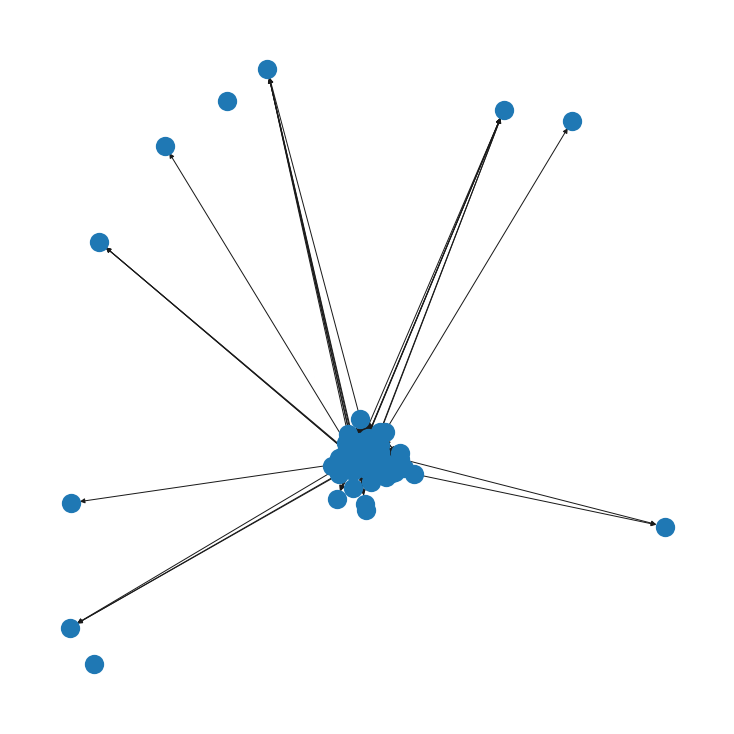

In [176]:
coords = nx.spring_layout(bike_graph, scale=50)
plt.figure(figsize=(10,10))
nx.draw(bike_graph, 
       pos=coords)

In [ ]:
# notice that there're self-loops
print(G.edges(data = True)[:4])
print()

# examine the density (the proportion of nodes that are connected)
num_edges = len(G.edges())
num_possible_edges = len(G.nodes()) ** 2
density = num_edges / num_possible_edges
print('density:', density)

### Basic concepts and definitions
- adjacency matrix
- paths
- connected components

* Centrality measures
    * degree
    * closeness
    * pagerank
    * betweenness

In [6]:
# Creating a list of degree, closeness, pagerank and betweenness centrality
degree_centrality = nx.degree_centrality(graph_object)
closeness_centrality = nx.closeness_centrality(graph_object)
pagerank = nx.pagerank(graph_object, weight="weight")
betweenness_centrality = nx.betweenness_centrality(graph_object, weight='weight')

centrality_measures = [degree_centrality,
                       closeness_centrality,
                       pagerank,
                       betweenness_centrality]

In [7]:
df_centrality_measures = pd.DataFrame.from_records(
    centrality_measures).T.rename(columns={
        0: "degree",
        1: "closeness",
        2: "pagerank",
        3: "betweenness"
    })
df_centrality_measures.head()

,degree,closeness,pagerank,betweenness
72,0.397833,0.616129,0.001857,0.001229
116,0.425697,0.630036,0.002754,0.001293
127,0.462848,0.644585,0.003299,0.004447
128,0.512384,0.665982,0.003410,0.002346
146,0.362229,0.605666,0.001724,0.001800


In [8]:
# pearson correlation between centrality measures
df_centrality_measures_corr = df_centrality_measures.corr()
df_centrality_measures_corr.replace(1,0)

,degree,closeness,pagerank,betweenness
degree,0.000000,0.912746,0.886320,0.667742
closeness,0.912746,0.000000,0.776652,0.618269
pagerank,0.886320,0.776652,0.000000,0.642883
betweenness,0.667742,0.618269,0.642883,0.000000


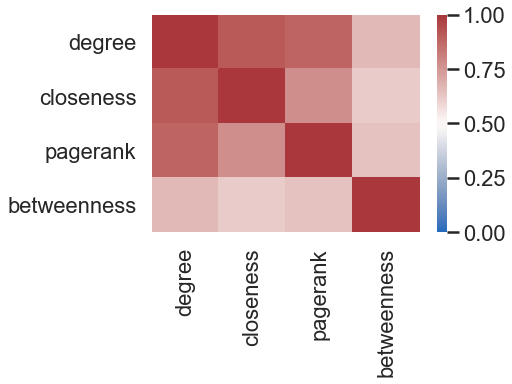

In [9]:
# heatmap of pearson correlations between centrality measures
sns.set(context="poster")
cmap = sns.cm.vlag
sns.heatmap(df_centrality_measures_corr, vmin=0, vmax=1, cmap=cmap)
plt.show()

* Structural features of social networks
    * heterogeneity
    * assortativity
    * clustering
    * small world
    * (communities)
* Network models
    * random graphs
    * generative models

In [10]:
# graph plot, weight = counts / duration
# graph dependend on week day (Mo-Fr vs. Sa-Su) / season (summer vs winter)

In [11]:
References:
# https://www.kaggle.com/mmmarchetti/game-of-thrones-network-analysis
# https://campus.datacamp.com/courses/introduction-to-network-analysis-in-python/introduction-to-networks?ex=4

SyntaxError: invalid syntax (<ipython-input-11-d6fee225d020>, line 1)